In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
import numpy as np
import matplotlib as mpl
from utils import paths
import os

In [13]:
df = pd.read_excel(os.path.join(paths.DATA, 'GPR1.xlsx'), skiprows=15) # read data
work_orders = pd.read_excel(os.path.join(paths.DATA_OCT, 'Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx'))

In [16]:
df.head()

,Unnamed: 0,Division,Sub-division,Line Segment,Track ID,Collection Date,GPR Run Number,Laser Run number,Start KM,End KM,...,Unnamed: 45,Volume (cubic m),Category.3,Volume (cubic m).1,Category.4,Volume (cubic m).2,Category.5,Unnamed: 52,Surface Mudspot,Unnamed: 54
0,NaN,Brisbane,XX,125,1,2015-05-26,1,1.2,0.0061,0.0011,...,NaN,0.553,5,-0.072,3,0.496,4,NaN,1,NaN
1,NaN,Brisbane,XX,125,1,2015-05-26,1,1.2,0.0112,0.0061,...,NaN,0.500,4,-0.078,3,0.028,3,NaN,1,NaN
2,NaN,Brisbane,XX,125,1,2015-05-26,1,1.2,0.0163,0.0112,...,NaN,0.525,5,-0.067,3,-0.044,3,NaN,1,NaN
3,NaN,Brisbane,XX,125,1,2015-05-26,1,1.2,0.0214,0.0163,...,NaN,0.667,5,0.003,3,0.380,4,NaN,1,NaN
4,NaN,Brisbane,XX,125,1,2015-05-26,1,1.2,0.0265,0.0214,...,NaN,0.765,5,-0.031,3,0.330,4,NaN,1,NaN


In [17]:
df = df.rename(columns={"Unnamed: 53":"Surface Mudspot"})
cols = [c for c in df.columns if c.lower()[:7] != 'unnamed']
df = df[cols] ## remove unnamed cols

In [18]:
df = df.replace(-999, np.NAN) # replace -999 with NA

In [19]:
geometry = [Point(xy) for xy in zip(df['Dec.Long'], df['Dec.Lat'])] ## state geometry
geo_df = gpd.GeoDataFrame(df, crs = {'init':'epsg:4326'}, geometry = geometry) # create geopandas df
geo_df.columns

Index(['Division', 'Sub-division', 'Line Segment', 'Track ID',
       'Collection Date', 'GPR Run Number', 'Laser Run number', 'Start KM',
       'End KM', 'Geolink', 'Dec.Lat', 'Dec.Long', 'PVC Value', 'Category',
       'PVC Value.1', 'Category.1', 'PVC Value.2', 'Category.2', 'Left*',
       'Centre', 'Right', 'Left*.1', 'Centre.1', 'Right.1', 'Left*.2',
       'Centre.2', 'Right.2', 'Left*.3', 'Centre.3', 'Right.3', 'Left*.4',
       'Centre.4', 'Right.4', 'Left*.5', 'Centre.5', 'Right*',
       'Volume (cubic m)', 'Category.3', 'Volume (cubic m).1', 'Category.4',
       'Volume (cubic m).2', 'Category.5', 'Surface Mudspot', 'geometry'],
      dtype='object')

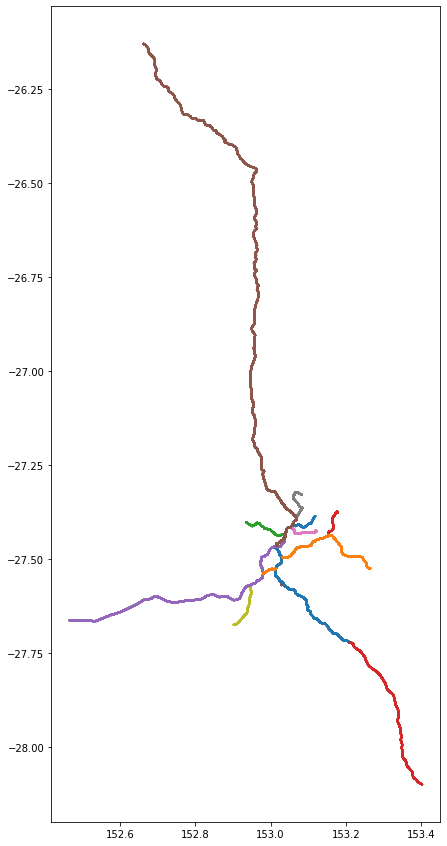

In [20]:
## plot lines according to subdivision
fig,ax = plt.subplots(figsize = (15,15))
geo_df.plot(ax = ax, column = 'Sub-division', markersize = 1)

In [1]:
## plot PVC value -- percentage void contamination Red indicates highly fouled and above
fig,ax = plt.subplots(figsize = (15,15))
geo_df.plot(ax = ax, column = 'PVC Value.1', markersize =2,  cmap='hot', legend = True)


NameError: name 'plt' is not defined

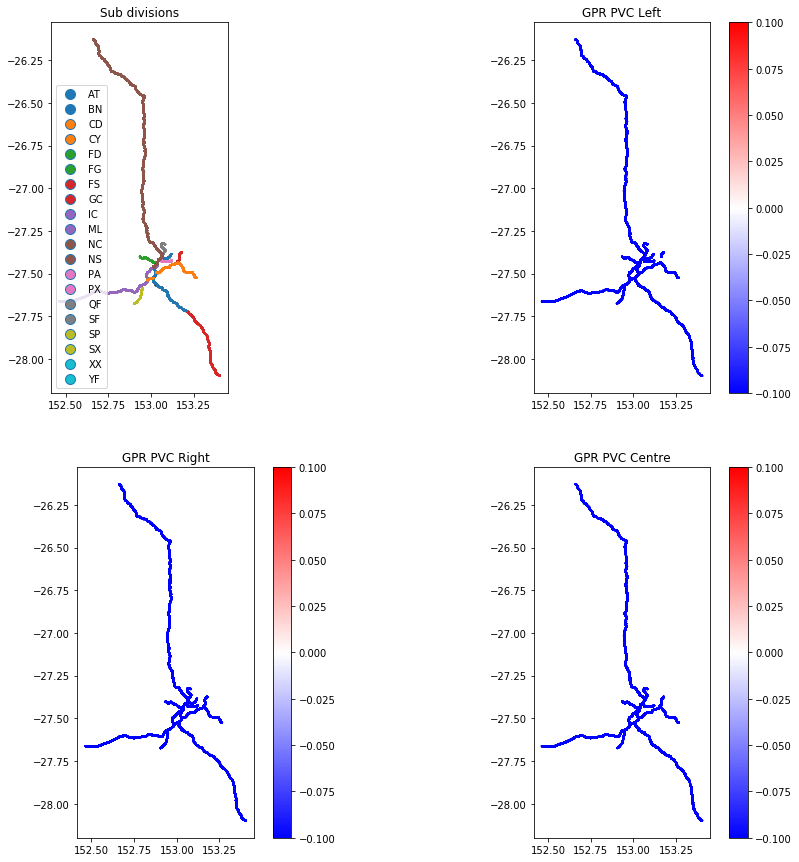

In [8]:
#  GPR PVC
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('GPR PVC Left')
geo_df.plot(ax = axes[0,1], column = 'PVC Value', markersize = 1, legend = True, cmap = 'bwr')
axes[1,1].set_title('GPR PVC Centre')
geo_df.plot(ax = axes[1,1], column = 'PVC Value.1', markersize = 1, legend = True, cmap = 'bwr')
axes[1,0].set_title('GPR PVC Right')
geo_df.plot(ax = axes[1,0], column = 'PVC Value.2', markersize = 1, legend = True,cmap = 'bwr')

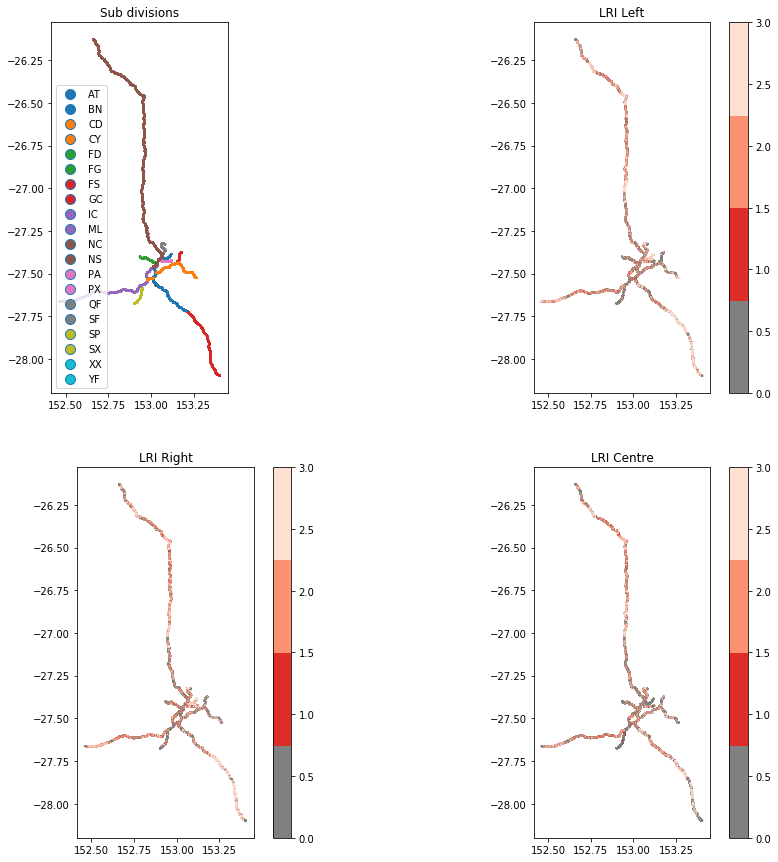

In [9]:
# LRI
cmap = mpl.colors.ListedColormap(['grey', '#de2d26', '#fc9272', '#fee0d2'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('LRI Left')
geo_df.plot(ax = axes[0,1], column = 'Left*', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('LRI Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('LRI Right')
geo_df.plot(ax = axes[1,0], column = 'Right', markersize = 1, legend = True,cmap = cmap)

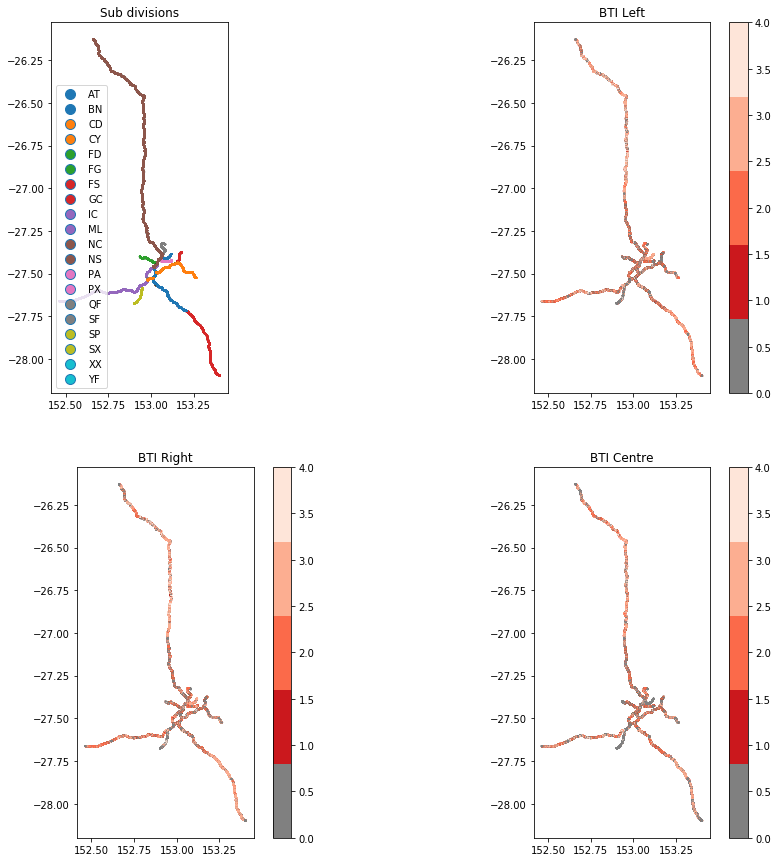

In [10]:
# BTI
cmap4 = mpl.colors.ListedColormap(['grey', '#cb181d','#fb6a4a', '#fcae91', '#fee5d9'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('BTI Left')
geo_df.plot(ax = axes[0,1], column = 'Left*.1', markersize = 1, legend = True, cmap = cmap4)
axes[1,1].set_title('BTI Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre.1', markersize = 1, legend = True, cmap = cmap4)
axes[1,0].set_title('BTI Right')
geo_df.plot(ax = axes[1,0], column = 'Right.1', markersize = 1, legend = True,cmap = cmap4)

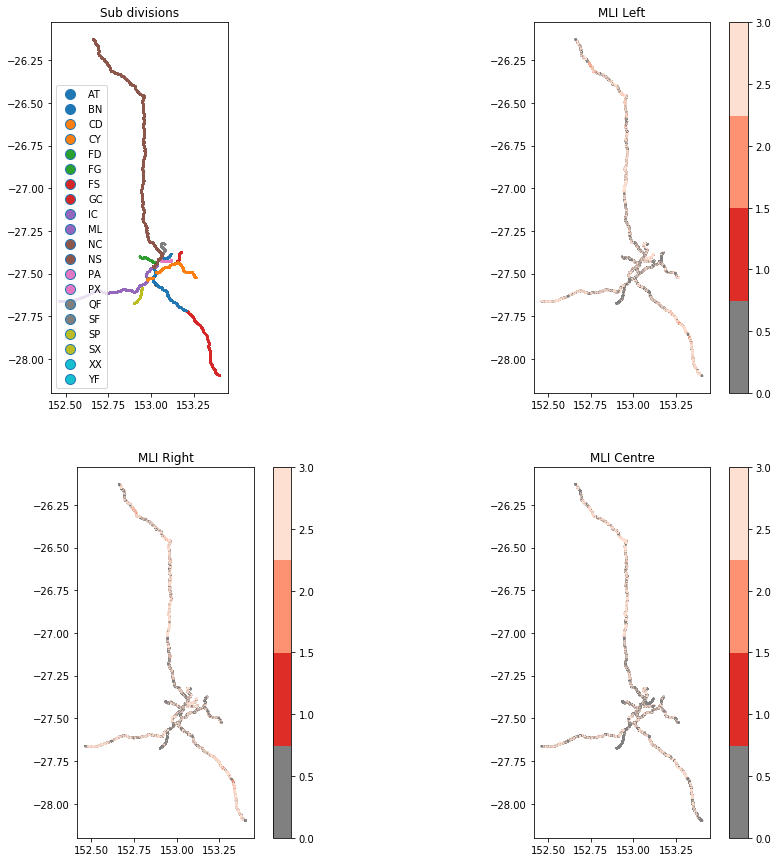

In [11]:
# Moisture Likelihood Index
cmap = mpl.colors.ListedColormap(['grey', '#de2d26', '#fc9272', '#fee0d2'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('MLI Left')
geo_df.plot(ax = axes[0,1], column = 'Left*.2', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('MLI Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre.2', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('MLI Right')
geo_df.plot(ax = axes[1,0], column = 'Right.2', markersize = 1, legend = True,cmap = cmap)

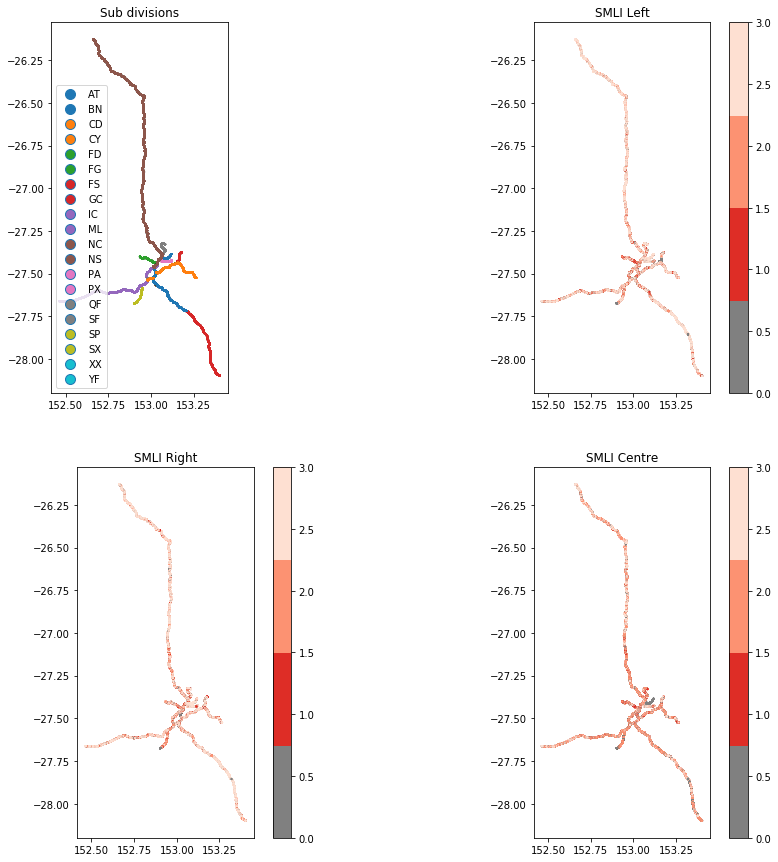

In [12]:
# Surface Moisture Likelihood Index
cmap = mpl.colors.ListedColormap(['grey', '#de2d26', '#fc9272', '#fee0d2'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('SMLI Left')
geo_df.plot(ax = axes[0,1], column = 'Left*.3', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('SMLI Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre.3', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('SMLI Right')
geo_df.plot(ax = axes[1,0], column = 'Right.3', markersize = 1, legend = True,cmap = cmap)

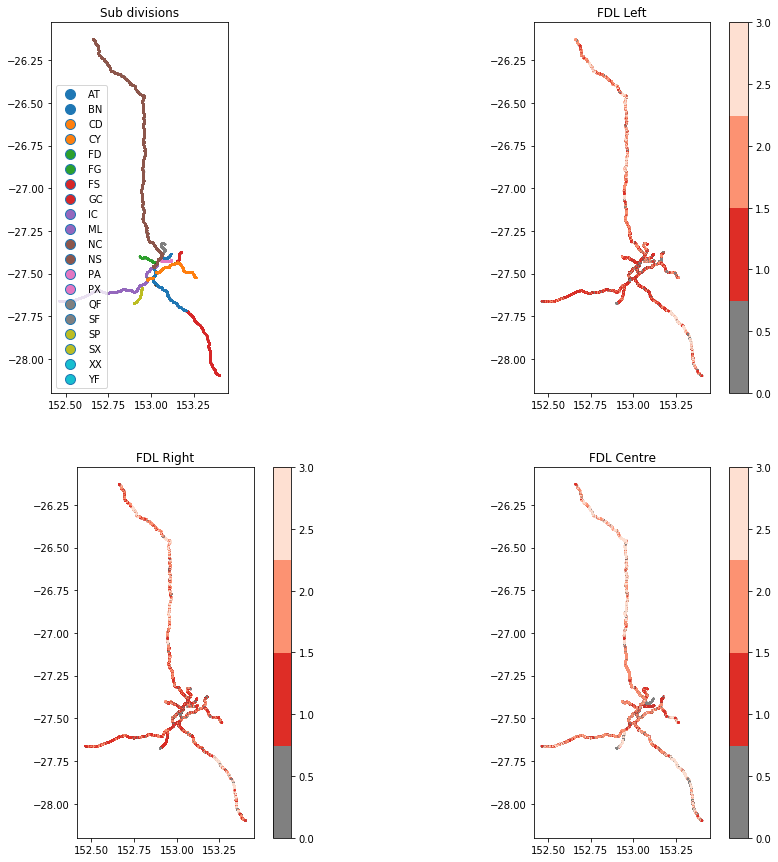

In [13]:
# Free Draining Layer
cmap = mpl.colors.ListedColormap(['grey', '#de2d26', '#fc9272', '#fee0d2'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('FDL Left')
geo_df.plot(ax = axes[0,1], column = 'Left*.4', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('FDL Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre.4', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('FDL Right')
geo_df.plot(ax = axes[1,0], column = 'Right.4', markersize = 1, legend = True,cmap = cmap)

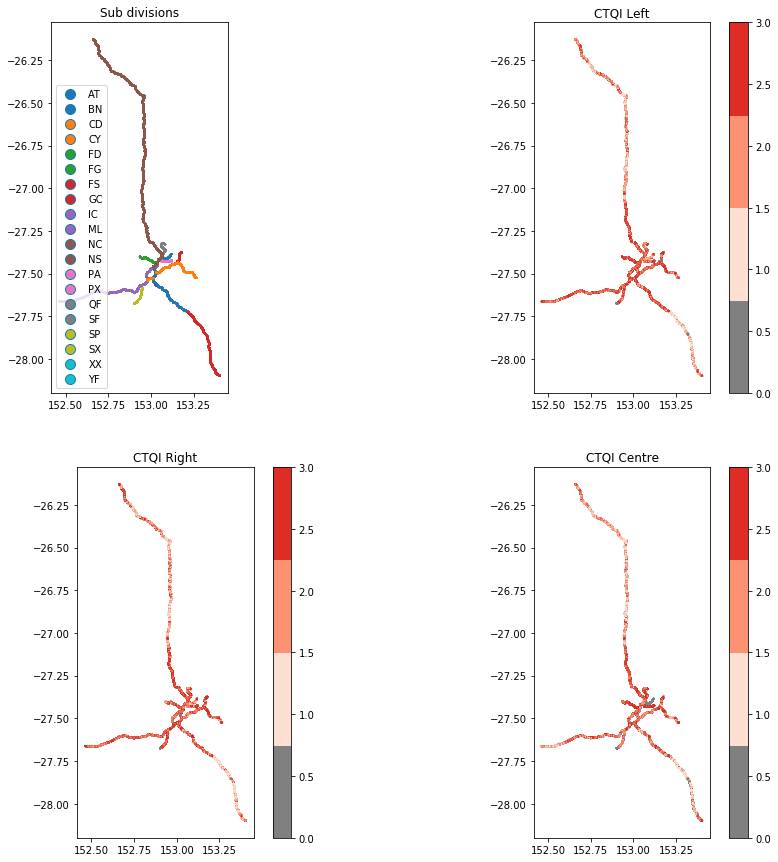

In [14]:
# Combined trackbed quality index 1 = good, 3 = poor
cmap = mpl.colors.ListedColormap(['grey','#fee0d2' , '#fc9272','#de2d26' ])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('CTQI Left')
geo_df.plot(ax = axes[0,1], column = 'Left*.5', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('CTQI Centre')
geo_df.plot(ax = axes[1,1], column = 'Centre.5', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('CTQI Right')
geo_df.plot(ax = axes[1,0], column = 'Right*', markersize = 1, legend = True,cmap = cmap)

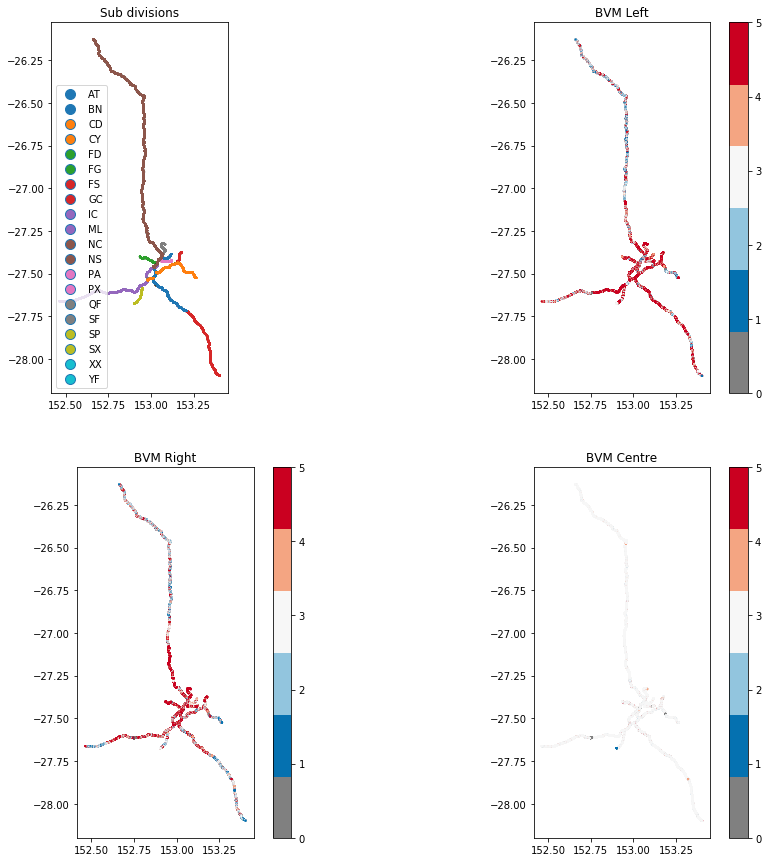

In [15]:
# Ballast Volume Metric - divergent 3 = within limits, 1 = large deficit, 5 = large excess, 3 = poor
cmap = mpl.colors.ListedColormap(['grey','#0571b0' , '#92c5de','#f7f7f7', '#f4a582', '#ca0020'])
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes[0,0].set_title('Sub divisions')
geo_df.plot(ax = axes[0,0], column = 'Sub-division', markersize = 1, legend = True)
axes[0,1].set_title('BVM Left')
geo_df.plot(ax = axes[0,1], column = 'Category.3', markersize = 1, legend = True, cmap = cmap)
axes[1,1].set_title('BVM Centre')
geo_df.plot(ax = axes[1,1], column = 'Category.4', markersize = 1, legend = True, cmap = cmap)
axes[1,0].set_title('BVM Right')
geo_df.plot(ax = axes[1,0], column = 'Category.5', markersize = 1, legend = True,cmap = cmap)

In [17]:
## load regional map (solar exposure )
street_map = gpd.read_file('../data/DP_QLD_SOLAR_MODEL/aerosol.shp')

In [18]:
box = [(geo_df['Dec.Long'].min()-1,geo_df['Dec.Lat'].min()-1),
      (geo_df['Dec.Long'].max()+1,geo_df['Dec.Lat'].min()-1),
      (geo_df['Dec.Long'].max()+1,geo_df['Dec.Lat'].max()+1),
      (geo_df['Dec.Long'].min()-1,geo_df['Dec.Lat'].max()+1)]

In [19]:
sm2 = street_map[street_map.within(Polygon(box))]

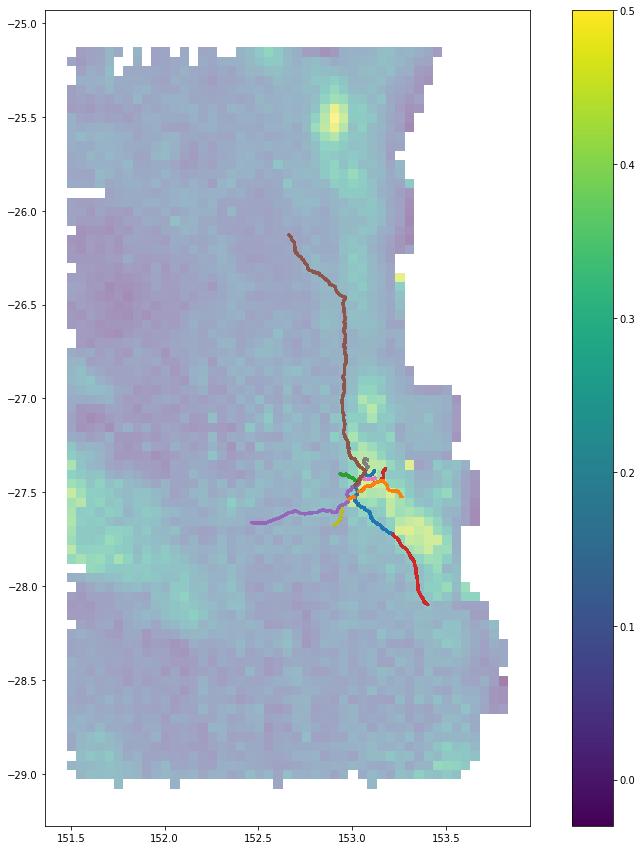

In [20]:
## Plot where the measured train lines are in QLD 
fig,ax = plt.subplots(figsize = (15,15))
sm2.plot(column = 'GridVal', ax = ax, alpha = 0.5, legend = True)
geo_df.plot(ax = ax, column = 'Sub-division', markersize = 2)

In [21]:
## smaller box
box = [(geo_df['Dec.Long'].min()-0.1,geo_df['Dec.Lat'].min()-0.1),
      (geo_df['Dec.Long'].max()+0.1,geo_df['Dec.Lat'].min()-0.1),
      (geo_df['Dec.Long'].max()+0.1,geo_df['Dec.Lat'].max()+0.1),
      (geo_df['Dec.Long'].min()-0.1,geo_df['Dec.Lat'].max()+0.1)]